In [42]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import stumpy
from sklearn.preprocessing import StandardScaler
from dao import DataLoading
from matplotlib.patches import Rectangle
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA

<h2> Testing For Stationarity </h2>

In [47]:
#investigating whether all the datasets are stationary or not
num_datasets = len(os.listdir(DataLoading.file_path))
adfuller_results = dict()
adfuller_results["Dataset"] = list()
adfuller_results["ADF Statistic"] = list()
adfuller_results["P value"] = list()
adfuller_results["Stationary"] = list()
adfuller_results["Lags used"] = list()
adfuller_results["1% Statistic"] = list()
adfuller_results["5% Statistic"] = list()
adfuller_results["10% Statistic"] = list()
for i in range(1,221,10):
    print(i)
    train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = i)
    data = np.concatenate((train,test)).reshape(-1,1)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    result = adfuller(data,autolag='AIC')
    adfuller_results["Dataset"].append(i)
    adfuller_results["ADF Statistic"].append(result[0])
    adfuller_results["P value"].append(result[1])
    if result[1] < 0.05:
        adfuller_results["Stationary"].append(True)
    else: 
        adfuller_results["Stationary"].append(False)
    adfuller_results["Lags used"].append(result[2])
    adfuller_results["1% Statistic"].append(result[4]["1%"])
    adfuller_results["5% Statistic"].append(result[4]["5%"])
    adfuller_results["10% Statistic"].append(result[4]["10%"])

adfuller_results_df = pd.DataFrame(adfuller_results)
adfuller_results_df

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211


,Dataset,ADF Statistic,P value,Stationary,Lags used,1% Statistic,5% Statistic,10% Statistic
0,1,-31.135457,0.000000e+00,True,63,-3.430432,-2.861576,-2.566789
1,11,-30.311115,0.000000e+00,True,50,-3.430568,-2.861637,-2.566821
2,21,-12.417765,4.203032e-23,True,33,-3.430897,-2.861782,-2.566899
3,31,-11.920863,5.036201e-22,True,36,-3.431227,-2.861927,-2.566976
4,41,-18.391657,2.200207e-30,True,50,-3.430570,-2.861637,-2.566822
5,51,-21.371618,0.000000e+00,True,40,-3.430926,-2.861795,-2.566906
6,61,-27.037520,0.000000e+00,True,61,-3.430451,-2.861585,-2.566794
7,71,-35.969295,0.000000e+00,True,58,-3.430469,-2.861593,-2.566798
8,81,-45.853811,0.000000e+00,True,80,-3.430384,-2.861555,-2.566778
9,91,-43.166574,0.000000e+00,True,72,-3.430401,-2.861562,-2.566782


In [3]:
adfuller_results_df

,ADF Statistic,P value,Stationary,Lags used,1% Statistic,5% Statistic,10% Statistic
0,-31.135457,0.000000e+00,True,63,-3.430432,-2.861576,-2.566789
1,-30.311115,0.000000e+00,True,50,-3.430568,-2.861637,-2.566821
2,-12.417765,4.203032e-23,True,33,-3.430897,-2.861782,-2.566899
3,-11.920863,5.036201e-22,True,36,-3.431227,-2.861927,-2.566976
4,-18.391657,2.200207e-30,True,50,-3.430570,-2.861637,-2.566822
5,-21.371618,0.000000e+00,True,40,-3.430926,-2.861795,-2.566906
6,-27.037520,0.000000e+00,True,61,-3.430451,-2.861585,-2.566794
7,-35.969295,0.000000e+00,True,58,-3.430469,-2.861593,-2.566798
8,-45.853811,0.000000e+00,True,80,-3.430384,-2.861555,-2.566778
9,-43.166574,0.000000e+00,True,72,-3.430401,-2.861562,-2.566782


In [46]:
#investigating whether all the datasets are stationary or not
num_datasets = len(os.listdir(DataLoading.file_path))
adfuller_results = dict()
adfuller_results["Dataset"] = list()
adfuller_results["ADF Statistic"] = list()
adfuller_results["P value"] = list()
adfuller_results["Stationary"] = list()
adfuller_results["Lags used"] = list()
adfuller_results["1% Statistic"] = list()
adfuller_results["5% Statistic"] = list()
adfuller_results["10% Statistic"] = list()
for i in [1,50,100,150,200,250]:
    print(i)
    train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = i)
    data = np.concatenate((train,test)).reshape(-1,1)
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    result = adfuller(data,autolag='AIC')
    adfuller_results["Dataset"].append(i)
    adfuller_results["ADF Statistic"].append(result[0])
    adfuller_results["P value"].append(result[1])
    if result[1] < 0.05:
        adfuller_results["Stationary"].append(True)
    else: 
        adfuller_results["Stationary"].append(False)
    adfuller_results["Lags used"].append(result[2])
    adfuller_results["1% Statistic"].append(result[4]["1%"])
    adfuller_results["5% Statistic"].append(result[4]["5%"])
    adfuller_results["10% Statistic"].append(result[4]["10%"])

adfuller_results_df = pd.DataFrame(adfuller_results)
adfuller_results_df

1
50
100
150
200
250


,Dataset,ADF Statistic,P value,Stationary,Lags used,1% Statistic,5% Statistic,10% Statistic
0,1,-31.135457,0.000000e+00,True,63,-3.430432,-2.861576,-2.566789
1,50,-21.861152,0.000000e+00,True,40,-3.430931,-2.861797,-2.566907
2,100,-16.418053,2.546028e-29,True,50,-3.430568,-2.861637,-2.566821
3,150,-15.744970,1.242888e-28,True,50,-3.430569,-2.861637,-2.566822
4,200,-41.116283,0.000000e+00,True,71,-3.430401,-2.861563,-2.566782
5,250,-9.456176,4.478928e-16,True,39,-3.430977,-2.861817,-2.566918


In [4]:
adfuller_results_df.to_csv("Stationary Results.csv")

Above representative datasets shows that the datasets are stationary as all the AD FUller tests have pvalues lower than 0.05.

Text(0.5, 1.0, 'First Dataset')

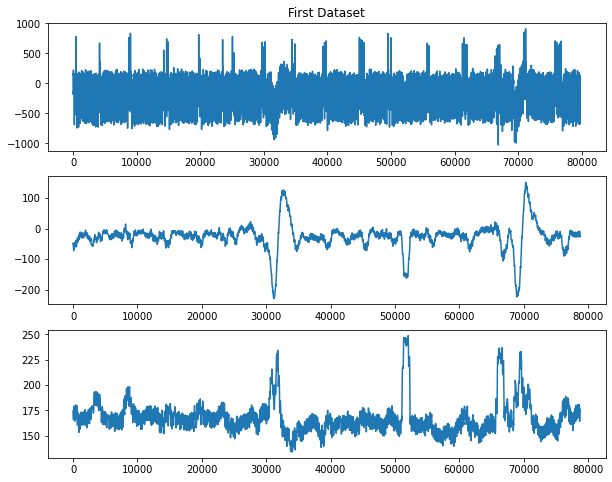

In [31]:
train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = 1)
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
data = np.concatenate((train,test))
fig,ax = plt.subplots(3,1,figsize = (10,8))
m = 1000
moving_average = list()
moving_std = list()
for i in range(0,data.shape[0] - m + 1):
    data_window = data[i:i+m]
    moving_average.append(np.mean(data_window))
    moving_std.append(np.std(data_window))

ax[0].plot(range(data.shape[0]),data)
ax[1].plot(range(data.shape[0] - m + 1),np.array(moving_average))
ax[2].plot(range(data.shape[0] - m + 1),np.array(moving_std))
ax[0].set_title('First Dataset')

Text(0.5, 1.0, '50th Dataset')

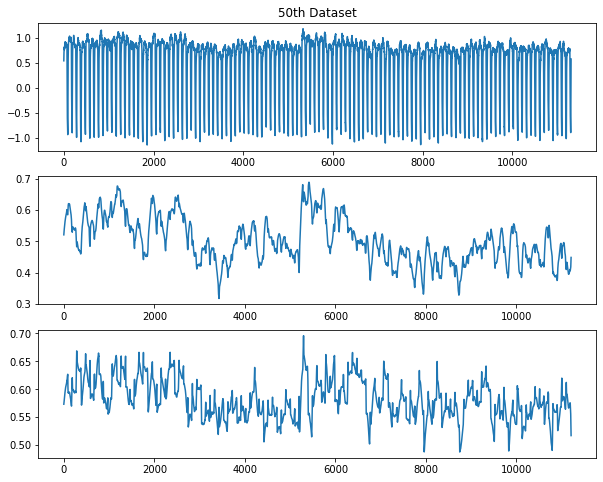

In [36]:
train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = 50)
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
data = np.concatenate((train,test))
fig,ax = plt.subplots(3,1,figsize = (10,8))
m = 100
moving_average = list()
moving_std = list()
for i in range(0,data.shape[0] - m + 1):
    data_window = data[i:i+m]
    moving_average.append(np.mean(data_window))
    moving_std.append(np.std(data_window))

ax[0].plot(range(data.shape[0]),data)
ax[1].plot(range(data.shape[0] - m + 1),np.array(moving_average))
ax[2].plot(range(data.shape[0] - m + 1),np.array(moving_std))
ax[0].set_title('50th Dataset')

Text(0.5, 1.0, '100th Dataset')

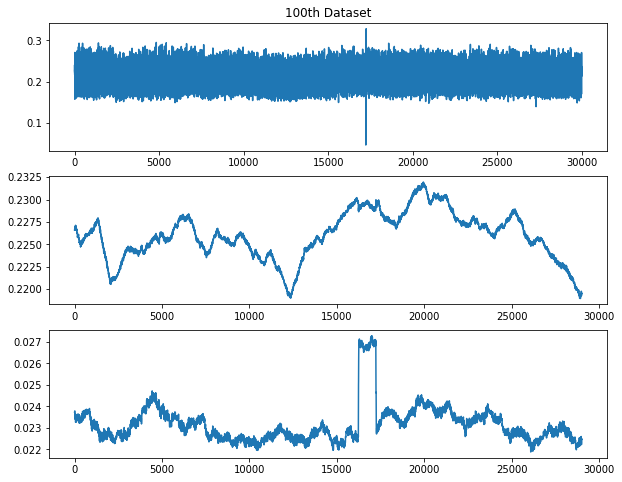

In [37]:
train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = 100)
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
data = np.concatenate((train,test))
fig,ax = plt.subplots(3,1,figsize = (10,8))
m = 1000
moving_average = list()
moving_std = list()
for i in range(0,data.shape[0] - m + 1):
    data_window = data[i:i+m]
    moving_average.append(np.mean(data_window))
    moving_std.append(np.std(data_window))

ax[0].plot(range(data.shape[0]),data)
ax[1].plot(range(data.shape[0] - m + 1),np.array(moving_average))
ax[2].plot(range(data.shape[0] - m + 1),np.array(moving_std))
ax[0].set_title('100th Dataset')

Text(0.5, 1.0, '150th Dataset')

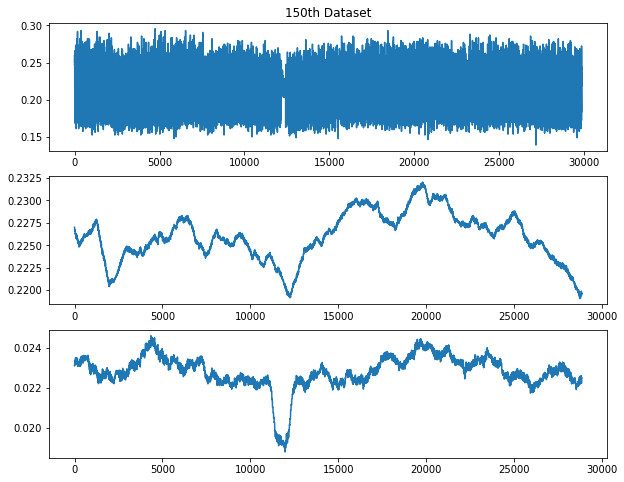

In [39]:
train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = 150)
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
data = np.concatenate((train,test))
fig,ax = plt.subplots(3,1,figsize = (10,8))
m = 1000
moving_average = list()
moving_std = list()
for i in range(0,data.shape[0] - m + 1):
    data_window = data[i:i+m]
    moving_average.append(np.mean(data_window))
    moving_std.append(np.std(data_window))

ax[0].plot(range(data.shape[0]),data)
ax[1].plot(range(data.shape[0] - m + 1),np.array(moving_average))
ax[2].plot(range(data.shape[0] - m + 1),np.array(moving_std))
ax[0].set_title('150th Dataset')

Text(0.5, 1.0, '200th Dataset')

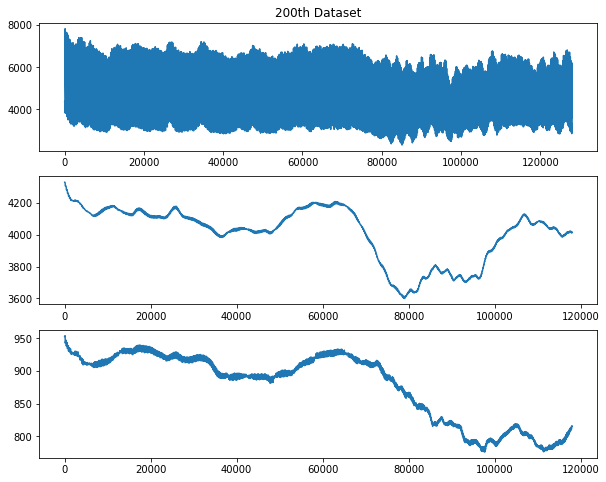

In [41]:
train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = 200)
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
data = np.concatenate((train,test))
fig,ax = plt.subplots(3,1,figsize = (10,8))
m = 10000
moving_average = list()
moving_std = list()
for i in range(0,data.shape[0] - m + 1):
    data_window = data[i:i+m]
    moving_average.append(np.mean(data_window))
    moving_std.append(np.std(data_window))

ax[0].plot(range(data.shape[0]),data)
ax[1].plot(range(data.shape[0] - m + 1),np.array(moving_average))
ax[2].plot(range(data.shape[0] - m + 1),np.array(moving_std))
ax[0].set_title('200th Dataset')

Text(0.5, 1.0, '250th Dataset')

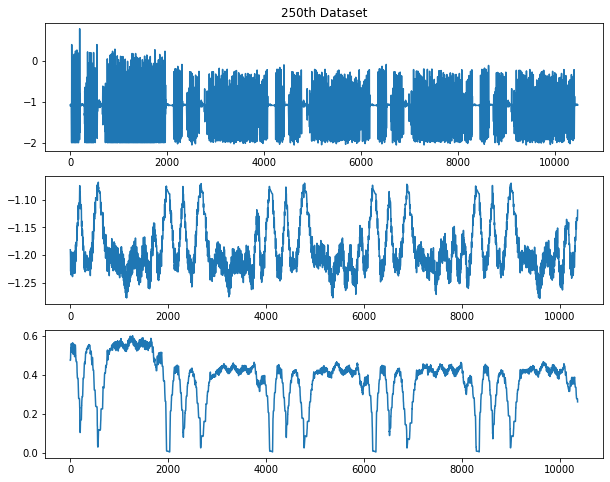

In [23]:
train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = 250)
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
data = np.concatenate((train,test))
fig,ax = plt.subplots(3,1,figsize = (10,8))
m = 100
moving_average = list()
moving_std = list()
for i in range(0,data.shape[0] - 100 + 1):
    data_window = data[i:i+m]
    moving_average.append(np.mean(data_window))
    moving_std.append(np.std(data_window))

ax[0].plot(range(data.shape[0]),data)
ax[1].plot(range(data.shape[0] - m + 1),np.array(moving_average))
ax[2].plot(range(data.shape[0] - m + 1),np.array(moving_std))
ax[0].set_title('250th Dataset')

Text(0.5, 1.0, '250th Dataset')

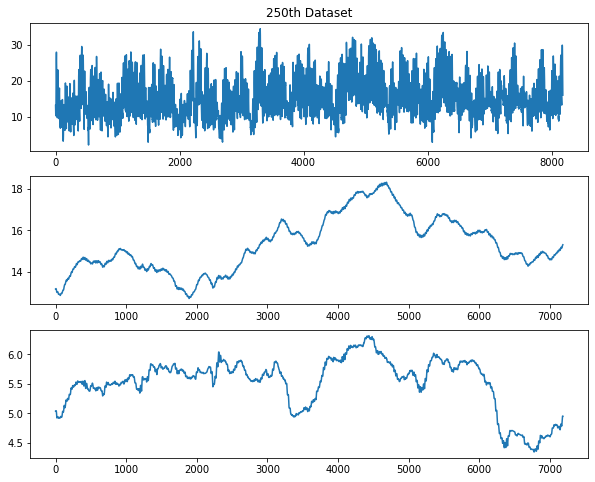

In [25]:
train,test,test_data_start_pt = DataLoading.split_data(file_path = DataLoading.file_path,index = 5)
train = np.array(train).reshape(-1,1)
test = np.array(test).reshape(-1,1)
data = np.concatenate((train,test))
fig,ax = plt.subplots(3,1,figsize = (10,8))
m = 1000
moving_average = list()
moving_std = list()
for i in range(0,data.shape[0] - m + 1):
    data_window = data[i:i+m]
    moving_average.append(np.mean(data_window))
    moving_std.append(np.std(data_window))

ax[0].plot(range(data.shape[0]),data)
ax[1].plot(range(data.shape[0] - m + 1),np.array(moving_average))
ax[2].plot(range(data.shape[0] - m + 1),np.array(moving_std))
ax[0].set_title('250th Dataset')

In [45]:
list(range(1,251,49))

[1, 50, 99, 148, 197, 246]